In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

# Preprocessing:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate

# LSTM NN:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Library related to Support Vector Machine:
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, classification_report, average_precision_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, make_scorer, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.datasets import make_classification

# Evaluation:
from sklearn.metrics import f1_score, confusion_matrix

# Plot:
import matplotlib.pyplot as plt

## Import Data

In [38]:
data = pd.read_csv("creditcard.csv")
df = pd.DataFrame(data)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Preprocessing

### Data Information, Check for Null Data

In [39]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [40]:
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [41]:
number_of_fraud = len(data[data.Class == 1])
number_of_no_fraud = len(data[data.Class == 0])

print("Number of Fraud: " + str(number_of_fraud))
print("Number of Non-Fraud: " + str(number_of_no_fraud))

# Number of fraud: 492, number of non-fraud: 284315 (imbalanced dataset)

Number of Fraud: 492
Number of Non-Fraud: 284315


### Training Data: Undersampling

In [42]:
# Partitioning data:
limit = int(0.80 * len(df))
train_us = df[0:limit]

# Separating the frauds and non-frauds data:
train_1_us = train_us[train_us['Class'] == 1]
train_0_us = train_us[train_us['Class'] == 0]
print('Positive data: ' + str(len(train_1_us)))

# Since there are 440 frauds in our training data set, we need to take a similar number of non-frauds data to balance our training dataset.
sample_0 = train_0_us.sample(600)

# Concatenate the frauds and non-frauds data for the training dataset.
df_train_us = pd.concat([train_1_us, sample_0])
df_train_us = df_train_us.sample(frac = 1)

# Drop features that are not needed, set xtrain and ytrain.
xtrain_us = df_train_us.drop(['Time', 'Class'], axis = 1)
ytrain_us = df_train_us['Class']

transaction_losses = xtrain_us['Amount'].values

xtrain_us = np.asarray(xtrain_us)
ytrain_us = np.asarray(ytrain_us)

Positive data: 417


### Test Data

In [43]:
# Test data for undersampling:
test = df.loc[limit:]

# Drop features that are not needed, set xtest and ytest.
xtest_us = test.drop(['Time', 'Class'], axis = 1)
ytest_us = test['Class']

xtest_us = np.asarray(xtest_us)
ytest_us = np.asarray(ytest_us)

In [44]:
len(test[test.Class == 0])

56887

## K-Fold and SVM

In [63]:
model = svm.SVC(probability = True, random_state = 1)
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
    
fp_rates = [] # store fp rate
fn_rates = [] # store fn rate

fp_losses = []
fn_losses = [] # store misclassified data

accuracies = []
precisions = []
recalls = []
aucrocs = [] # evaluation metrics
    
for train_idx, val_idx in cv.split(xtrain_us, ytrain_us):
    xtrain_cv, xval_cv = xtrain_us[train_idx], xtrain_us[val_idx]
    ytrain_cv, yval_cv = ytrain_us[train_idx], ytrain_us[val_idx]

    model.fit(xtrain_cv, ytrain_cv)
    yval_svm_pred = model.predict(xval_cv)

    tn, fp, fn, tp = confusion_matrix(yval_cv, yval_svm_pred).ravel() # confusion matrix
        
    # rate of misclassified classes (fp and fn)
    fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    fn_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    fp_rates.append(fp_rate)
    fn_rates.append(fn_rate)

    # separate misclassified data (fp and fn)
    fp_misclassified_idx = val_idx[(yval_svm_pred == 1) & (yval_cv == 0)]
    fn_misclassified_idx = val_idx[(yval_svm_pred == 0) & (yval_cv == 1)]
    fp_losses.extend(transaction_losses[fp_misclassified_idx])
    fn_losses.extend(transaction_losses[fn_misclassified_idx])

    # metrics
    accuracy = accuracy_score(yval_cv, yval_svm_pred)
    precision = precision_score(yval_cv, yval_svm_pred, average = 'binary')
    recall = recall_score(yval_cv, yval_svm_pred, average = 'binary')
    aucroc = roc_auc_score(yval_cv, yval_svm_pred)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    aucrocs.append(aucroc)

# train final model using the whole train us data
model.fit(xtrain_us, ytrain_us)
yval_svm_test = model.predict(xtest_us)

# evaluation metrics
accuracy_test = accuracy_score(ytest_us, yval_svm_test)
precision_test = precision_score(ytest_us, yval_svm_test, average = 'binary')
recall_test = recall_score(ytest_us, yval_svm_test, average = 'binary')
aucroc_test = roc_auc_score(ytest_us, yval_svm_test)

fpr, tpr, thresholds = roc_curve(ytest_us, yval_svm_test, drop_intermediate = False)
auc_test_svm = auc(fpr, tpr)
    
# means of fp and fn rates, fp and fn loss average
fp_mean = np.mean(fp_rates)
fn_mean = np.mean(fn_rates)
fp_std = np.std(fp_rates)
fn_std = np.std(fn_rates)
fp_loss_avg = np.mean(fp_losses)
fn_loss_avg = np.mean(fn_losses)

In [64]:
# PRINT WHAT YOU NEED HERE
print(np.mean(recalls))
print(np.mean(precisions))
print(np.mean(aucrocs))

print("---")
print(precision_test)
print(recall_test)
print(aucroc_test)

print("---")
print(aucrocs)

0.625842044134727
0.9335350138306197
0.7962543554006969
---
0.03015873015873016
0.5066666666666667
0.742592742337148
---
[0.8333333333333333, 0.8249999999999998, 0.7976190476190477, 0.8011904761904761, 0.7833333333333333, 0.7535714285714284, 0.8333333333333333, 0.7876016260162603, 0.7882113821138211, 0.759349593495935]


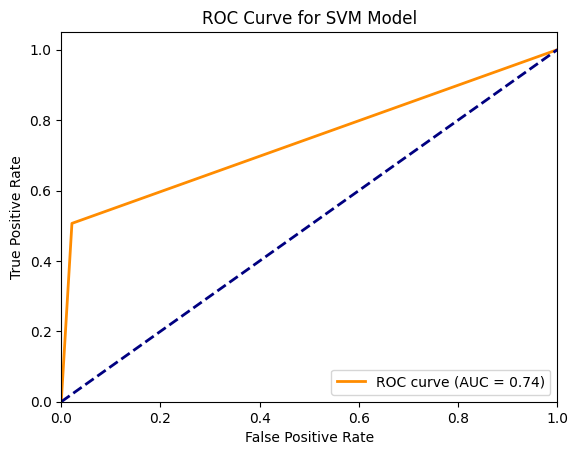

In [65]:
# plot roc curve svm
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % auc_test_svm)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc = "lower right")
plt.show()

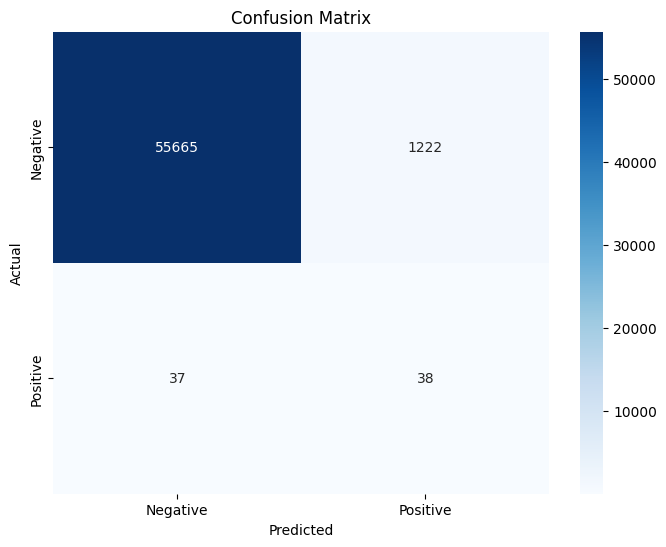

In [47]:
# Generate confusion matrix
conf_matrix = confusion_matrix(ytest_us, yval_svm_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Monte Carlo for SVM Model

In [48]:
n_simulations = 10000

fp1 = []
fp2 = [] # lower and upper bound of fp CI
fn1 = []
fn2 = [] # lower and upper bound of fn CI (for finding average)

for i in range(n_simulations):
    simulated_fp_rates = np.random.normal(fp_mean, fp_std, 1000)
    simulated_fn_rates = np.random.normal(fp_mean, fp_std, 1000)

    fp_loss = simulated_fp_rates * len(xtrain_us) * fp_loss_avg
    fn_loss = simulated_fn_rates * len(xtrain_us) * fn_loss_avg

    quantiles_fp = np.percentile(fp_loss, [2.5, 97.5])
    quantiles_fn = np.percentile(fn_loss, [2.5, 97.5])

    fp1.append(quantiles_fp[0])
    fp2.append(quantiles_fp[1])
    fn1.append(quantiles_fn[0])
    fn2.append(quantiles_fn[1])

print("average fp 2.5th percentile error:", np.mean(fp1))
print("average fp 97.5th percentile error:", np.mean(fp2))
print("average fn 2.5th percentile error:", np.mean(fn1))
print("average fn 97.5th percentile error:", np.mean(fn2))

average fp 2.5th percentile error: -25598.68180071064
average fp 97.5th percentile error: 74614.04360276979
average fn 2.5th percentile error: -3657.627619342597
average fn 97.5th percentile error: 10654.872163697315


#### plots

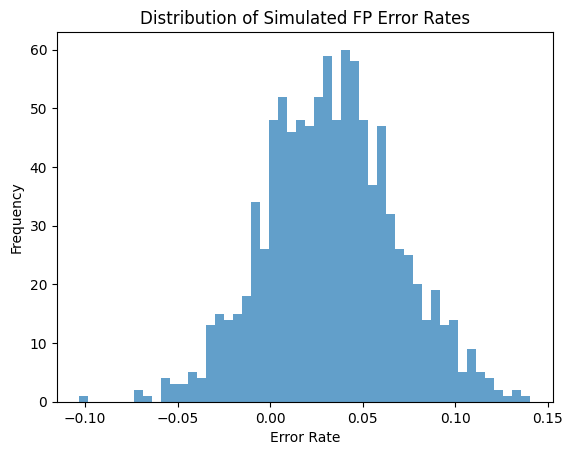

In [49]:
# Plot the distribution of fp error
plt.hist(simulated_fp_rates, bins=50, alpha=0.7)
plt.title('Distribution of Simulated FP Error Rates')
plt.xlabel('Error Rate')
plt.ylabel('Frequency')
plt.show()

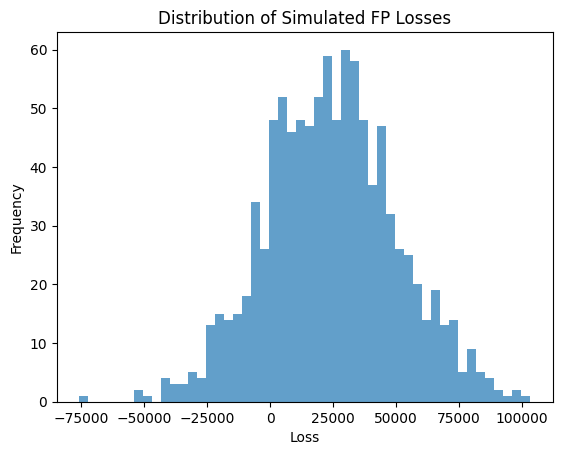

In [50]:
# Plot the distribution of simulated losses
plt.hist(fp_loss, bins=50, alpha=0.7)
plt.title('Distribution of Simulated FP Losses')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

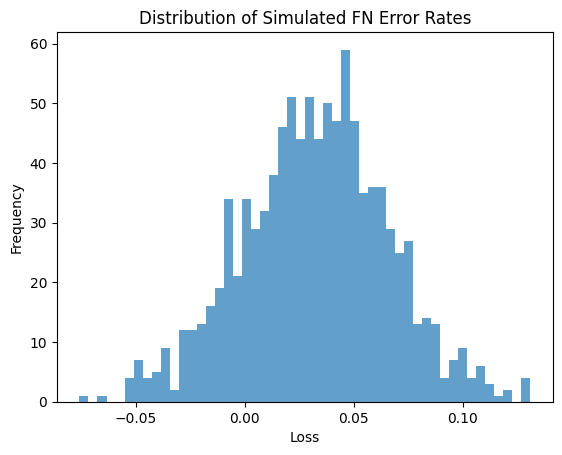

In [51]:
# Plot the distribution of fn error
plt.hist(simulated_fn_rates, bins=50, alpha=0.7)
plt.title('Distribution of Simulated FN Error Rates')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

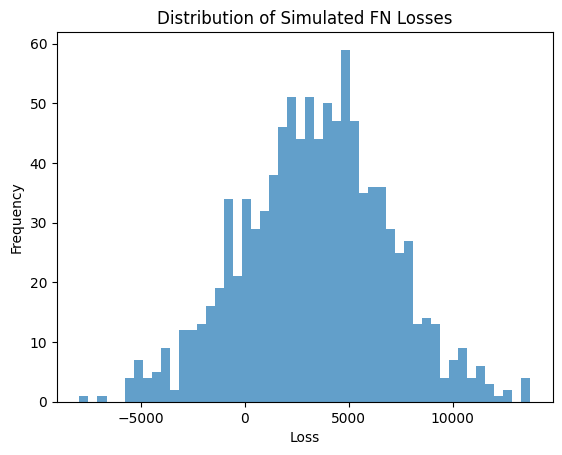

In [52]:
# Plot the distribution of simulated losses
plt.hist(fn_loss, bins=50, alpha=0.7)
plt.title('Distribution of Simulated FN Losses')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

## NN (MLP)

In [53]:
def model_mlp():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=xtrain_us.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [58]:
tf.random.set_seed(88)

# init kfold
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# lists
nn_accuracies = []
nn_precisions = []
nn_recalls = []
nn_aucrocs = [] # evaluation metric

fp_rates_nn = [] # store fp rate
fn_rates_nn = [] # store fn rate

fp_losses_nn = []
fn_losses_nn = [] # store misclassified data
    
# kfold cv + model
for train_idx, val_idx in cv.split(xtrain_us, ytrain_us):
    xtrain_cv, xval_cv = xtrain_us[train_idx], xtrain_us[val_idx]
    ytrain_cv, yval_cv = ytrain_us[train_idx], ytrain_us[val_idx]

    # model and predict validation data
    modelmlp = model_mlp()
    modelmlp.fit(xtrain_cv, ytrain_cv, epochs=10, batch_size=32, verbose=0)

    yval_mlp_prob = modelmlp.predict(xval_cv)
    yval_mlp_nn = (yval_mlp_prob > 0.5).astype("int32").flatten()

    # confusion mat
    tn, fp, fn, tp = confusion_matrix(yval_cv, yval_mlp_nn).ravel() # confusion matrix
        
    # rate of misclassified classes (fp and fn)
    fp_rate_nn = fp / (fp + tn) if (fp + tn) > 0 else 0
    fn_rate_nn = fn / (fn + tp) if (fn + tp) > 0 else 0
    fp_rates_nn.append(fp_rate_nn)
    fn_rates_nn.append(fn_rate_nn)

    # separate misclassified data (fp and fn)
    fp_misclassified_idx_nn = val_idx[(yval_mlp_nn == 1) & (yval_cv == 0)]
    fn_misclassified_idx_nn = val_idx[(yval_mlp_nn == 0) & (yval_cv == 1)]
    fp_losses_nn.extend(transaction_losses[fp_misclassified_idx_nn])
    fn_losses_nn.extend(transaction_losses[fn_misclassified_idx_nn])

    # metrics
    accuracy = accuracy_score(yval_cv, yval_mlp_nn)
    precision = precision_score(yval_cv, yval_mlp_nn, average = 'binary')
    recall = recall_score(yval_cv, yval_mlp_nn, average = 'binary')
    aucroc = roc_auc_score(yval_cv, yval_mlp_nn)
    nn_accuracies.append(accuracy)
    nn_precisions.append(precision)
    nn_recalls.append(recall)
    nn_aucrocs.append(aucroc)

# train final model using the whole train us data
modelmlp.fit(xtrain_us, ytrain_us)
yval_mlp_prob = modelmlp.predict(xtest_us)
yval_mlp_test = (yval_mlp_prob > 0.5).astype("int32").flatten()

# evaluation metrics
accuracy_test_nn = accuracy_score(ytest_us, yval_mlp_test)
precision_test_nn = precision_score(ytest_us, yval_mlp_test, average = 'binary')
recall_test_nn = recall_score(ytest_us, yval_mlp_test, average = 'binary')
aucroc_test_nn = roc_auc_score(ytest_us, yval_mlp_test)

fpr, tpr, thresholds = roc_curve(ytest_us, yval_mlp_test, drop_intermediate = False)
auc_test_nn = auc(fpr, tpr)

fp_mean_nn = np.mean(fp_rates_nn)
fn_mean_nn = np.mean(fn_rates_nn)
fp_std_nn = np.std(fp_rates_nn)
fn_std_nn = np.std(fn_rates_nn)
fp_loss_avg_nn = np.mean(fp_losses_nn)
fn_loss_avg_nn = np.mean(fn_losses_nn)

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_420 (Dense)           (None, 64)                1920      
                                                                 
 dense_421 (Dense)           (None, 32)                2080      
                                                                 
 dense_422 (Dense)           (None, 16)                528       
                                                                 
 dense_423 (Dense)           (None, 8)                 136       
                                                                 
 dense_424 (Dense)           (None, 4)                 36        
                                                                 
 dense_425 (Dense)           (None, 2)                 10        
                                                                 
 dense_426 (Dense)           (None, 1)               

/Users/virajessica/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 [==============================] - 0s 2ms/step
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_462 (Dense)           (None, 64)                1920      
                                                                 
 dense_463 (Dense)           (None, 32)                2080      
                                                                 
 dense_464 (Dense)           (None, 16)                528       
                                                                 
 dense_465 (Dense)           (None, 8)                 136       
                                                                 
 dense_466 (Dense)           (None, 4)                 36        
                                                                 
 dense_467 (Dense)           (None, 2)                 10        
                                                                 
 d

/Users/virajessica/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 [==============================] - 0s 2ms/step
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_469 (Dense)           (None, 64)                1920      
                                                                 
 dense_470 (Dense)           (None, 32)                2080      
                                                                 
 dense_471 (Dense)           (None, 16)                528       
                                                                 
 dense_472 (Dense)           (None, 8)                 136       
                                                                 
 dense_473 (Dense)           (None, 4)                 36        
                                                                 
 dense_474 (Dense)           (None, 2)                 10        
                                                                 
 d

/Users/virajessica/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 [==============================] - 0s 2ms/step
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_476 (Dense)           (None, 64)                1920      
                                                                 
 dense_477 (Dense)           (None, 32)                2080      
                                                                 
 dense_478 (Dense)           (None, 16)                528       
                                                                 
 dense_479 (Dense)           (None, 8)                 136       
                                                                 
 dense_480 (Dense)           (None, 4)                 36        
                                                                 
 dense_481 (Dense)           (None, 2)                 10        
                                                                 
 d

In [59]:
# print what u need here a
print(precision_test_nn)
print(recall_test_nn)
print(aucroc_test_nn)
print(roccurve_test_nn)

print("---")
print(np.mean(nn_recalls))
print(np.mean(nn_precisions))
print(np.mean(nn_aucrocs))

print("---")
print(nn_aucrocs)

print("---")
print(fp_mean_nn)
print(fp_std_nn)
print(fn_mean_nn)
print(fn_std_nn)

0.03341645885286783
0.8933333333333333
0.9296328979673153
(array([0.        , 0.01573294, 1.        ]), array([0.        , 0.85333333, 1.        ]), array([inf,  1.,  0.]))
---
0.6251451800232288
0.6581191615402142
0.7984059233449476
---
[0.9392857142857143, 0.8988095238095237, 0.9630952380952381, 0.9523809523809523, 0.5, 0.5, 0.5, 0.9223577235772358, 0.90630081300813, 0.9018292682926828]
---
0.028333333333333332
0.027938424357067015
0.3748548199767712
0.4109972559234339


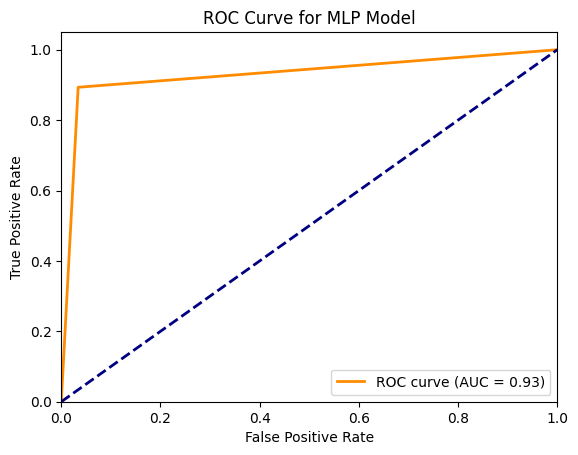

In [62]:
# plot roc curve nn
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % auc_test_nn)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Model')
plt.legend(loc = "lower right")
plt.show()

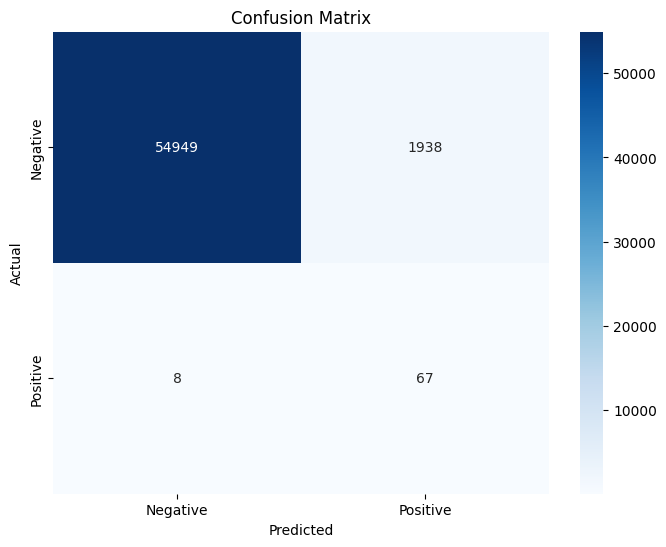

In [61]:
# Generate confusion matrix
conf_matrix = confusion_matrix(ytest_us, yval_mlp_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Monte Carlo for NN

In [21]:
n_simulations = 10000

fp1_nn = []
fp2_nn = [] # lower and upper bound of fp CI
fn1_nn = []
fn2_nn = [] # lower and upper bound of fn CI (for finding average)

for i in range(n_simulations):
    simulated_fp_rates_nn = np.random.normal(fp_mean_nn, fp_std_nn, 1000)
    simulated_fn_rates_nn = np.random.normal(fp_mean_nn, fp_std_nn, 1000)

    fp_loss_nn = simulated_fp_rates_nn * len(xtrain_us) * fp_loss_avg_nn
    fn_loss_nn = simulated_fn_rates_nn * len(xtrain_us) * fn_loss_avg_nn

    quantiles_fp_nn = np.percentile(fp_loss_nn, [2.5, 97.5])
    quantiles_fn_nn = np.percentile(fn_loss_nn, [2.5, 97.5])

    fp1_nn.append(quantiles_fp_nn[0])
    fp2_nn.append(quantiles_fp_nn[1])
    fn1_nn.append(quantiles_fn_nn[0])
    fn2_nn.append(quantiles_fn_nn[1])

print("average fp 2.5th percentile error:", np.mean(fp1_nn))
print("average fp 97.5th percentile error:", np.mean(fp2_nn))
print("average fn 2.5th percentile error:", np.mean(fn1_nn))
print("average fn 97.5th percentile error:", np.mean(fn2_nn))

average fp 2.5th percentile error: -53503.137042170725
average fp 97.5th percentile error: 88881.48474646
average fn 2.5th percentile error: -24775.413872682417
average fn 97.5th percentile error: 41164.11821652641


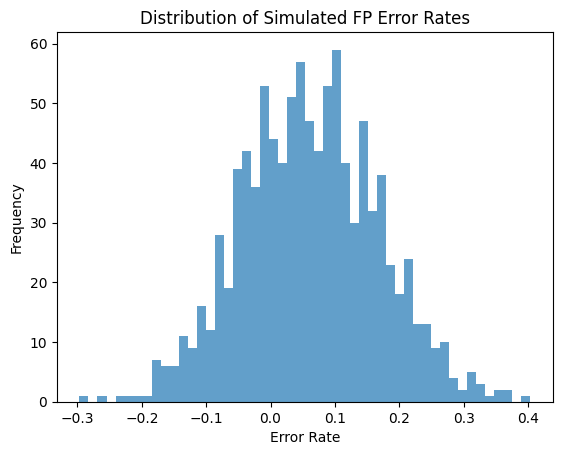

In [22]:
# Plot the distribution of fp error nn
plt.hist(simulated_fp_rates_nn, bins=50, alpha=0.7)
plt.title('Distribution of Simulated FP Error Rates')
plt.xlabel('Error Rate')
plt.ylabel('Frequency')
plt.show()

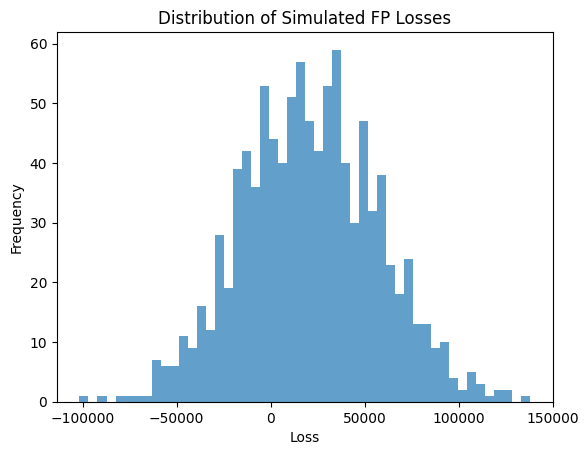

In [23]:
# Plot the distribution of simulated losses
plt.hist(fp_loss_nn, bins=50, alpha=0.7)
plt.title('Distribution of Simulated FP Losses')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

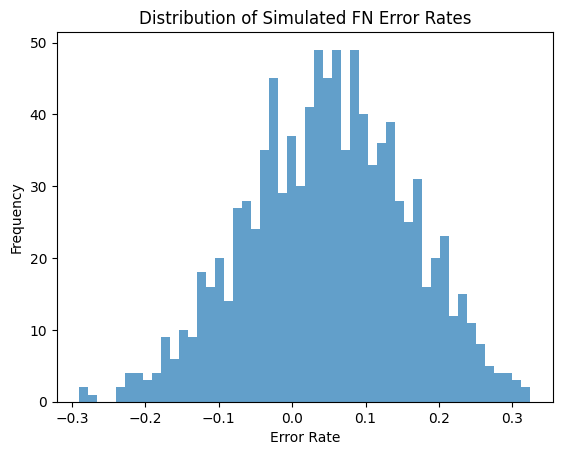

In [24]:
# Plot the distribution of fp error nn
plt.hist(simulated_fn_rates_nn, bins=50, alpha=0.7)
plt.title('Distribution of Simulated FN Error Rates')
plt.xlabel('Error Rate')
plt.ylabel('Frequency')
plt.show()

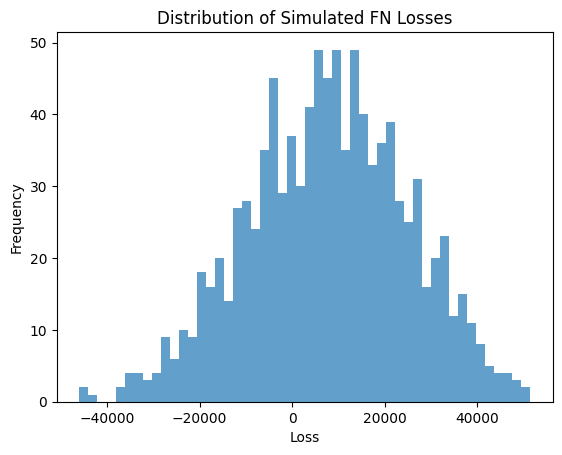

In [25]:
# Plot the distribution of simulated losses
plt.hist(fn_loss_nn, bins=50, alpha=0.7)
plt.title('Distribution of Simulated FN Losses')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

## t-test

In [26]:
from scipy.stats import ttest_ind
# Perform the t-test
t_stat, p_value = ttest_ind(aucrocs, nn_aucrocs)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - significant difference between the two groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the two groups")

T-statistic: -1.9262267446489736
P-value: 0.07001794480451654
Fail to reject the null hypothesis - no significant difference between the two groups


## plot auc roc

In [ ]:
# plot auc roc for 